In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
#first 10 rows of the data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
#number of rows and columns in this dataset
df.shape

(768, 9)

In [9]:
#statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# checking counts of output that is 'OutCome'
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# Mean value for both cases
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# seperating the data and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [13]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [14]:
# Performing standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [15]:
scaled_X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
# replacing scaled_X to X
X = scaled_X

In [17]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2)
# Let's check shapes
print(X.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [20]:
# Linear Regression
pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=2)),
                        ('lr', LogisticRegression())])

# Support Vector Classifier
pipeline_svc = Pipeline([('scaler2', StandardScaler()),
                        ('pca2', PCA(n_components=2)),
                        ('svc', SVC(kernel='linear'))])

# Decision Tree Classifier
pipeline_dt = Pipeline([('scaler3', StandardScaler()),
                        ('pca3', PCA(n_components=2)),
                        ('dt', DecisionTreeClassifier())])

# Random Forest Classifier
pipeline_rf = Pipeline([('scaler4', StandardScaler()),
                        ('pca4', PCA(n_components=2)),
                        ('rf', RandomForestClassifier(n_estimators=200))])

# K-Means 
pipeline_km = Pipeline([('scaler5', StandardScaler()),
                        ('pca5', PCA(n_components=2)),
                        ('km', KMeans(n_clusters=2, random_state=0))])

# Naive Bayes - GaussianNB
pipeline_gnb = Pipeline([('scaler6', StandardScaler()),
                        ('pca6', PCA(n_components=2)),
                        ('gnb', GaussianNB())])

# XGBoost CLassifier
pipeline_xgb = Pipeline([('scaler7', StandardScaler()),
                        ('pca7', PCA(n_components=2)),
                        ('xgb', XGBClassifier())])

# K-Nearest Neighbors 
pipeline_knb = Pipeline([('scaler8', StandardScaler()),
                        ('pca8', PCA(n_components=2)),
                        ('knb', KNeighborsClassifier())])

In [21]:
#List of pipelines
pipelines = [pipeline_svc, pipeline_dt, pipeline_gnb, pipeline_km, pipeline_lr, pipeline_xgb, pipeline_knb, pipeline_rf]
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

pipe_dict = {
    0:'Logistic Regression',
    1:"Support Vector Classifier",
    2:"Decision Tree",
    3:"Random Forest Classifier",
    4:"KMeans",
    5:"Naive Bayes",
    6:"XGBoostClassifier",
    7:"K-Nearest"
}

In [22]:
for pipe in pipelines:
  pipe.fit(X_train, y_train)

In [23]:
for i, model in enumerate(pipelines):
  print('{} Test Accuracy: {}\n'.format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.7012987012987013

Support Vector Classifier Test Accuracy: 0.6233766233766234

Decision Tree Test Accuracy: 0.6948051948051948

Random Forest Classifier Test Accuracy: -336.00468704535945

KMeans Test Accuracy: 0.7012987012987013

Naive Bayes Test Accuracy: 0.6493506493506493

XGBoostClassifier Test Accuracy: 0.6948051948051948

K-Nearest Test Accuracy: 0.6753246753246753



In [24]:
for i, model in enumerate(pipelines):
  if model.score(X_test, y_test) > best_accuracy:
    best_accuracy = model.score(X_test, y_test)
    best_pipeline = model
    best_classifier = i

print("Classifier with best accuracy: {}".format(pipe_dict[best_classifier]))

Classifier with best accuracy: Logistic Regression


In [53]:
#Training the model
model  = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
#importing tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [59]:
# prediction classes
y_pred = model.predict(X_test)

In [61]:
print("CLASSIFICATION REPORT: ")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [63]:
#Accuracy score of training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,y_train )*100

In [81]:
print("ACCURACY OF TRAINING DATA: ", round(training_data_accuracy, 2))


ACCURACY OF TRAINING DATA:  78.5


In [69]:
#Accuracy score of testing data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred,y_test)*100

In [71]:
print("ACCURACY OF TESTING DATA: ",testing_data_accuracy.round(2))

AttributeError: 'float' object has no attribute 'round'

In [73]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

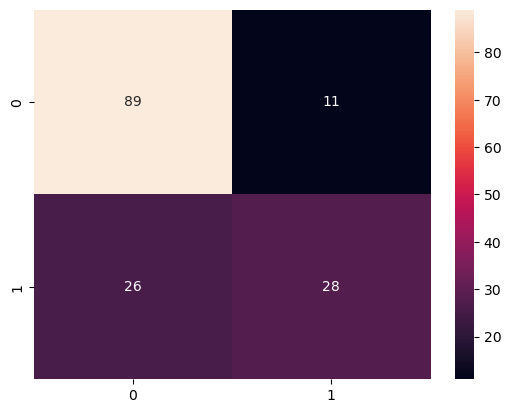

In [75]:
#Visualizing the Confusion Matrix
import seaborn as sns
sns.heatmap(cm,annot=True)

In [77]:
#Making a predictive System
# input_data = (4,110,92,0,0,37.6,0.191,30)  not diabetic 
input_data = (5,166,72,19,175,25.8,0.587,51)  # diabetic

# input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the inputdata
std_data = sc.transform(input_data_reshaped)
# print(std_data)

prediction = model.predict(std_data) # imp line
# print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic
